In [1]:
import numpy as np
import pandas as pd
import rename_columns
from  clean_string_content import clean_strings
import duplicate
import matplotlib.pyplot as plt
import seaborn as sns
from box_plot import box_plot
import functions_Ako
import yaml

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Loading the csv file
df = pd.read_csv(config['input_data']['file'])
df

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,22.38,53,Yes,Stable
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,74.51,57,Yes,Declining
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,50.85,82,No,Rising
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,25.93,66,No,Rising


In [5]:
# # Checking for Null Values

df.isnull()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# # Check for null values in each column
df.isna().any()

Game Title                 False
Genre                      False
Platform                   False
Release Year               False
Developer                  False
Revenue (Millions $)       False
Players (Millions)         False
Peak Concurrent Players    False
Metacritic Score           False
Esports Popularity         False
Trending Status            False
dtype: bool

In [7]:
# # Count the number of null values in each column
df.isna().sum()

Game Title                 0
Genre                      0
Platform                   0
Release Year               0
Developer                  0
Revenue (Millions $)       0
Players (Millions)         0
Peak Concurrent Players    0
Metacritic Score           0
Esports Popularity         0
Trending Status            0
dtype: int64

In [8]:
# Drop column 'Peak Concurrent Players'
df.drop('Peak Concurrent Players', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Yes,Stable


In [9]:
# Drop column 'Esports Popularity'
df.drop('Esports Popularity', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Stable


In [10]:
# # Drop column 'Trending Status'
df.drop('Trending Status', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91


In [11]:
# renaming columns
column_map = {
    'Game Title': 'game_title', 
    'Genre': 'genre', 
    'Platform': 'platform', 
    'Release Year': 'release_year', 
    'Developer': 'developer', 
    'Revenue (Millions $)': 'revenue_millions', 
    'Players (Millions)': 'players_millions',
    'Metacritic Score': 'metacritic_score'
}
df = rename_columns.rename_multiple_columns(df, column_map)
df

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,53
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,57
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,82
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,66


In [12]:
# change the data type
text_cols = df.select_dtypes(include="object").columns
df[text_cols]= df[text_cols].applymap(clean_strings)
df[text_cols]

C:\Users\davyg\AppData\Local\Temp\ipykernel_21132\3188047680.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[text_cols]= df[text_cols].applymap(clean_strings)


,game_title,genre,platform,release_year,developer
0,pixel odyssey 2,action,playstation,2024,square enix
1,battle warriors 4,strategy,cross platform,2024,ea
2,legends of valor 2,shooter,xbox,2024,square enix
3,shadow realms 4,action,nintendo switch,2024,microsoft
4,cyber quest 2,adventure,xbox,2024,microsoft
...,...,...,...,...,...
995,warzone chronicles 1,horror,nintendo switch,2000,ubisoft
996,zombie outbreak 3,fighting,cross platform,2000,ubisoft
997,battle warriors 5,fighting,pc,2000,rockstar
998,cyber quest 2,adventure,cross platform,2000,activision


In [13]:
# check the duplicate rows
df.duplicated().sum()

np.int64(0)

In [14]:
df.duplicated().any()

np.False_

In [15]:
# Remove duplicate rows
df = duplicate.remove_duplicate_rows(df, keep="first")
display(df)

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
0,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87
1,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92
2,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99
3,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73
4,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
995,warzone chronicles 1,horror,nintendo switch,2000,ubisoft,2654.16,174.49,53
996,zombie outbreak 3,fighting,cross platform,2000,ubisoft,2170.46,155.20,57
997,battle warriors 5,fighting,pc,2000,rockstar,2040.85,166.01,82
998,cyber quest 2,adventure,cross platform,2000,activision,2657.88,112.92,66


In [16]:
#display the statistics information
df.describe()

,revenue_millions,players_millions,metacritic_score
count,1000.000000,1000.000000,1000.000000
mean,2483.017800,103.499820,74.990000
std,1412.629451,58.869562,14.618536
min,11.430000,0.530000,50.000000
25%,1276.190000,52.005000,62.000000
50%,2476.130000,107.040000,76.000000
75%,3677.797500,155.632500,87.000000
max,4999.790000,199.980000,100.000000


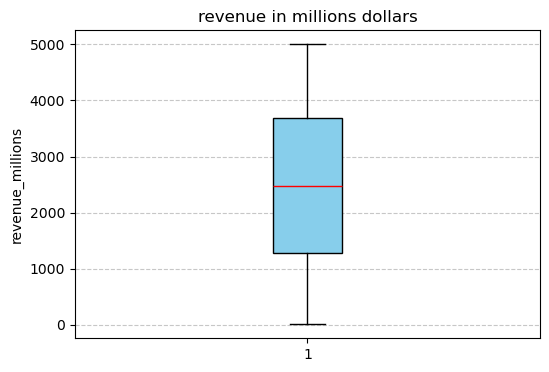

In [17]:
# visualizate the value to identify the outliers values
box_plot(df, column ="revenue_millions", title="revenue in millions dollars", color="skyblue")

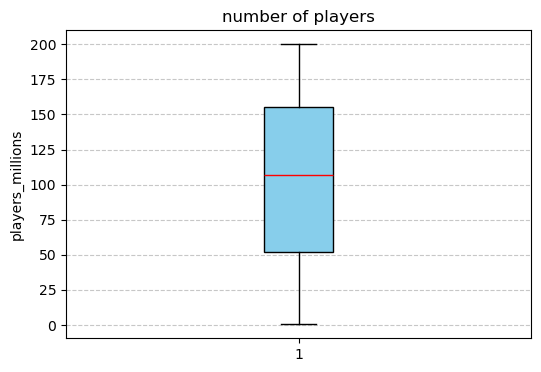

In [18]:
# visualizate the value to identify the outliers values
box_plot(df, column ="players_millions", title="number of players", color="skyblue")

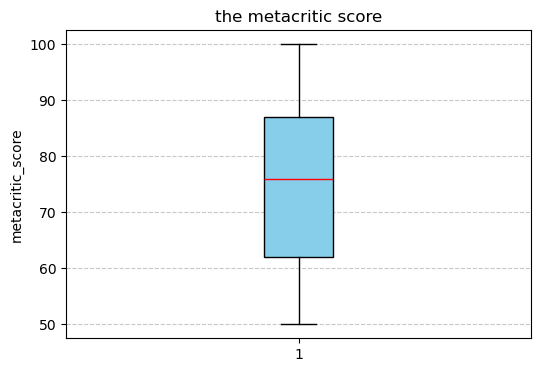

In [19]:
# visualizate the value to identify the outliers values
box_plot(df, column ="metacritic_score", title="the metacritic score", color="skyblue")

In [20]:
# reset the index from starting to 0 to starting from 1
df = functions_Ako.index_reset(df)
df

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
1,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87
2,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92
3,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99
4,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73
5,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
996,warzone chronicles 1,horror,nintendo switch,2000,ubisoft,2654.16,174.49,53
997,zombie outbreak 3,fighting,cross platform,2000,ubisoft,2170.46,155.20,57
998,battle warriors 5,fighting,pc,2000,rockstar,2040.85,166.01,82
999,cyber quest 2,adventure,cross platform,2000,activision,2657.88,112.92,66


In [21]:
# cleaning date convert the  string type into integer 
df["release_year"] = df["release_year"].astype(str).str.strip().str.replace(" ", "")
df["release_year"] = df["release_year"].astype(int)

# Data analysis

In [22]:
#Q1.Which platform has the highest average revenue per game? 

rev_per_game  = df.groupby(['platform', 'game_title'])['revenue_millions'].mean()
rev_per_game_df = rev_per_game.reset_index()
print(type(rev_per_game_df))
rev_per_game_df.sort_values(by='revenue_millions', ascending=False) 
rev_per_game_df.head(100)

mean_revenue_sorted = (
    rev_per_game_df.groupby('platform')['revenue_millions']
    .mean()
    .sort_values(ascending=False)
)

print(mean_revenue_sorted)

mean_revenue_sorted_df = mean_revenue_sorted.reset_index()
print(type(mean_revenue_sorted_df))
display(mean_revenue_sorted_df) 

<class 'pandas.core.frame.DataFrame'>
platform
nintendo switch    2606.145069
mobile             2548.546331
cross platform     2500.658914
xbox               2460.337939
pc                 2459.780791
playstation        2372.401521
Name: revenue_millions, dtype: float64
<class 'pandas.core.frame.DataFrame'>


,platform,revenue_millions
0,nintendo switch,2606.145069
1,mobile,2548.546331
2,cross platform,2500.658914
3,xbox,2460.337939
4,pc,2459.780791
5,playstation,2372.401521


In [23]:
#which has the highest median revenue per game
median_revenue_sorted = (
    rev_per_game_df.groupby('platform')['revenue_millions']
    .median()
    .sort_values(ascending=False)
)

print(median_revenue_sorted)

median_revenue_sorted_df = median_revenue_sorted.reset_index()
print(type(median_revenue_sorted_df))
display(median_revenue_sorted_df) 

platform
mobile             2593.550000
nintendo switch    2578.100833
cross platform     2472.650000
pc                 2447.620833
xbox               2388.647500
playstation        2338.268250
Name: revenue_millions, dtype: float64
<class 'pandas.core.frame.DataFrame'>


,platform,revenue_millions
0,mobile,2593.550000
1,nintendo switch,2578.100833
2,cross platform,2472.650000
3,pc,2447.620833
4,xbox,2388.647500
5,playstation,2338.268250


# what is the game title revenue median per platform

          platform  revenue_millions
1  nintendo switch       2578.100833
2   cross platform       2472.650000
4             xbox       2388.647500
5      playstation       2338.268250
<class 'pandas.core.frame.DataFrame'>


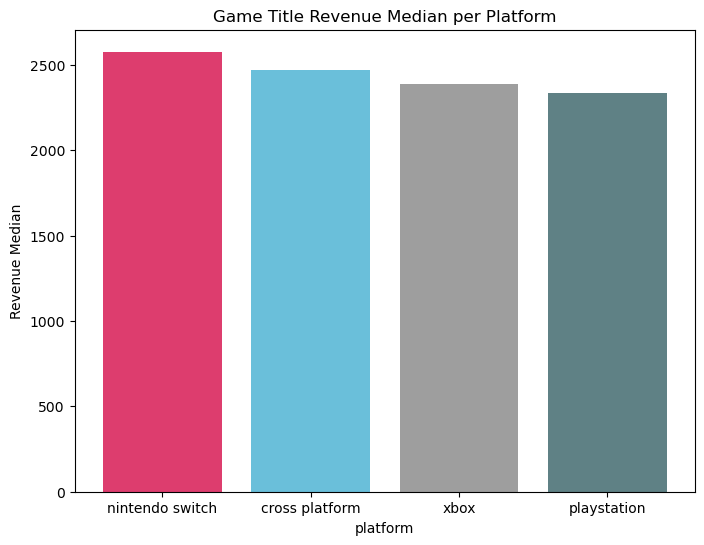

In [24]:
# creating a bar graph of revenue, median of platform.

filtered_df =median_revenue_sorted_df[
    (median_revenue_sorted_df['platform'] == 'nintendo switch') |
    (median_revenue_sorted_df['platform'] == 'cross platform') |
    (median_revenue_sorted_df['platform'] == 'playstation') |
    (median_revenue_sorted_df['platform'] == 'xbox')
]

print(filtered_df)

filtered_df = filtered_df.reset_index()
print(type(filtered_df))

platforms = filtered_df['platform']
median = filtered_df['revenue_millions']
mean = median_revenue_sorted_df['revenue_millions']

plt.figure(figsize=(8, 6)) # Set size for better viewing
plt.bar(platforms, median, color=['#dd3d6e','#6abfda', '#9e9e9e', '#5f8185'])

plt.xlabel('platform')
plt.ylabel('Revenue Median')
plt.title('Game Title Revenue Median per Platform')

plt.show()

# Overall, what is the correlation between Metacritic critic score and revenue?

In [25]:
# check the correlation between metacritic and revenue 
correlation = df['metacritic_score'].corr(df['revenue_millions'])
print(correlation)


0.01559465581129608


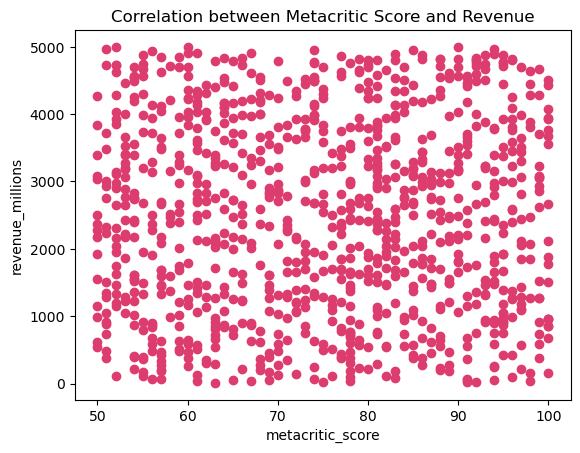

In [26]:
# check the correlation between metacritic and revenue 
plt.scatter(df['metacritic_score'], df['revenue_millions'], c='#dd3d6e')
plt.xlabel('metacritic_score')
plt.ylabel('revenue_millions')
plt.title('Correlation between Metacritic Score and Revenue')
plt.show()

In [27]:
# transform rows in float type
df['metacritic_score'] = df['metacritic_score'].astype(float)
df['revenue_millions'] = df['revenue_millions'].astype(float)

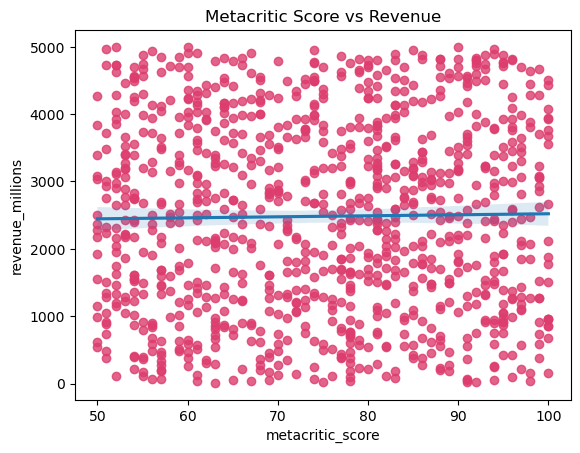

In [28]:
# display the metacritic score vs revenue graph
sns.regplot(x='metacritic_score', y='revenue_millions', data=df, scatter_kws={'color': '#dd3d6e'})
plt.title('Metacritic Score vs Revenue')
plt.show()

# Is there a “threshold” score (for example, above 80) after which median revenue increases sharply? 
 We are putting the scores in bins like 0–69, 70–79, 80–89, 90+.​¶

In [29]:
# creating bins for scores
bins = [0, 69, 79, 89, 100]
labels = ['0-69', '70-79', '80-89', '90+']

In [30]:
# creating a new column call Score bin
df['Score_Bin'] = pd.cut(df['metacritic_score'], bins=bins, labels=labels, right=True)

In [31]:
df.head()

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score,Score_Bin
1,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,87.0,80-89
2,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,92.0,90+
3,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,99.0,90+
4,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.40,73.0,70-79
5,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,91.0,90+


In [32]:
# create a group to check the value of the score
median_revenue_by_bin = df.groupby('Score_Bin')['revenue_millions'].median().reset_index()

print(median_revenue_by_bin)

  Score_Bin  revenue_millions
0      0-69          2496.760
1     70-79          2241.105
2     80-89          2588.840
3       90+          2577.560


C:\Users\davyg\AppData\Local\Temp\ipykernel_21132\2490296617.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_revenue_by_bin = df.groupby('Score_Bin')['revenue_millions'].median().reset_index()


C:\Users\davyg\AppData\Local\Temp\ipykernel_21132\3983880519.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


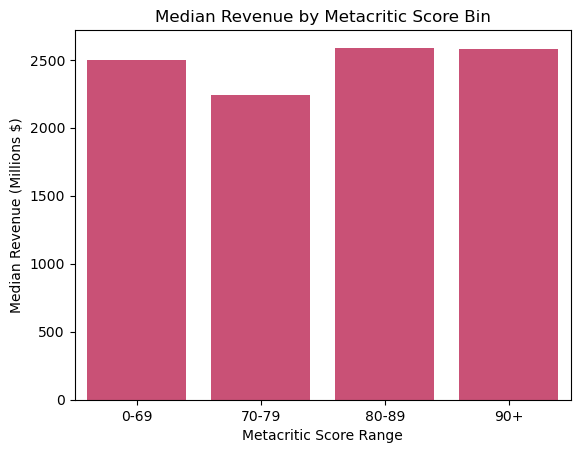

In [33]:
# visualization of the value of the score
sns.barplot(
    x='Score_Bin',
    y='revenue_millions',
    data=df,
    estimator=np.median,
    ci=None, color='#dd3d6e'
)
plt.title('Median Revenue by Metacritic Score Bin')
plt.ylabel('Median Revenue (Millions $)')
plt.xlabel('Metacritic Score Range')
plt.show()

# Portfolio and investment decision questions

# Which companies achieved a Metacritic score above 80 ?

In [34]:
# list of the companies with the highest metacritic score
high_score_games = df[df['metacritic_score'] > 80]
companies_above_80 = high_score_games['developer'].unique()
company_counts = high_score_games['developer'].value_counts()
print(company_counts)

developer
sony            47
microsoft       46
rockstar        45
square enix     44
capcom          44
ubisoft         39
activision      37
ea              35
bandai namco    34
nintendo        32
Name: count, dtype: int64


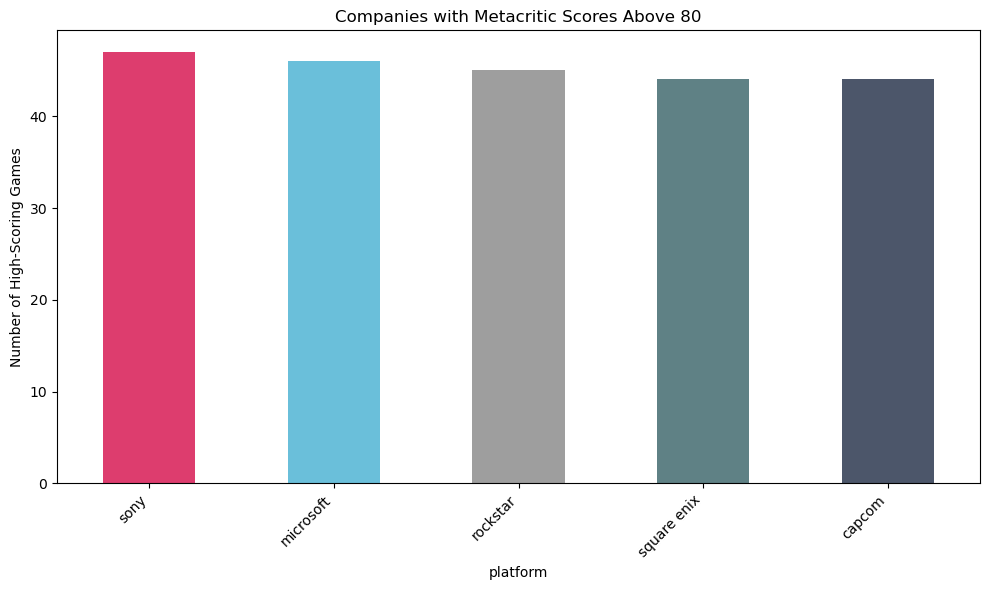

In [35]:
# 1. Filter games with score > 80
filtered_df = df[df["metacritic_score"] > 80]

# 2. Count the number of games of the company
company_counts = filtered_df["developer"].value_counts().head(5)

# 3. Visualization
plt.figure(figsize=(10,6))
company_counts.plot(kind='bar', color=['#dd3d6e','#6abfda', '#9e9e9e', '#5f8185', '#4c566a'])
plt.title("Companies with Metacritic Scores Above 80")
plt.xlabel("platform")
plt.ylabel("Number of High-Scoring Games")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Which companies delivered the best revenue

In [36]:
# Which companies delivered the best revenue 
# 1. Calculate the total revenue for each company
top5_revenue = (
    df.groupby("developer")["revenue_millions"]
           .sum()
           .sort_values(ascending=False)
           .head(5)
)

print(top5_revenue)

developer
sony          320316.24
activision    273990.20
rockstar      259235.71
capcom        259007.30
microsoft     253175.67
Name: revenue_millions, dtype: float64


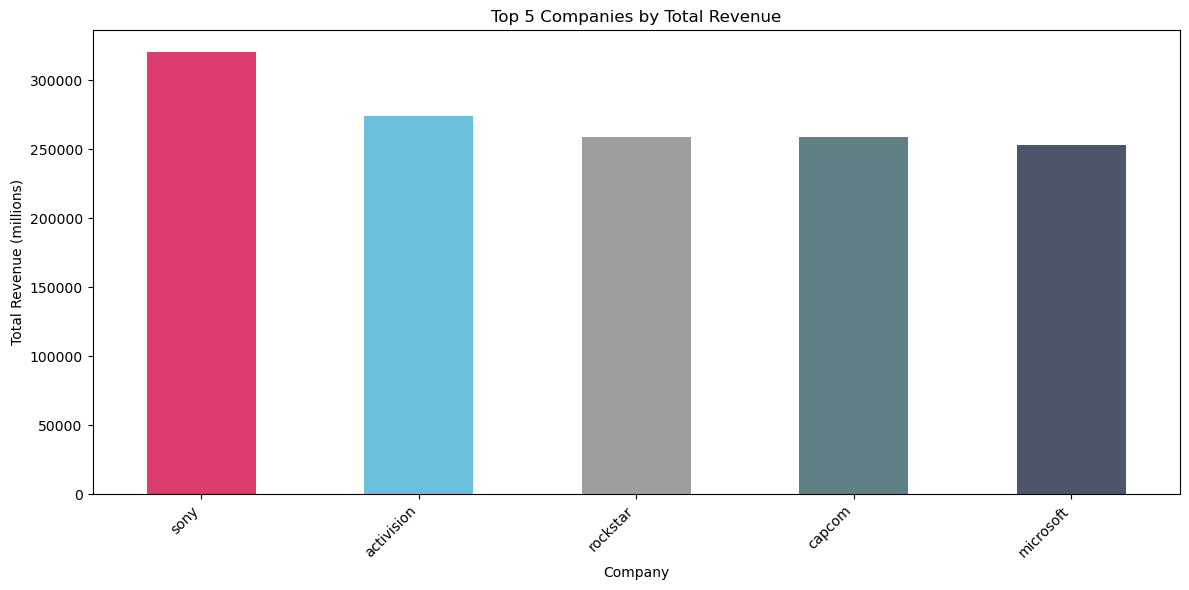

In [37]:

# 2. Visualization : TOP 5
plt.figure(figsize=(12,6))
top5_revenue.head(5).plot(kind='bar', color=['#dd3d6e','#6abfda','#9e9e9e', '#5f8185', '#4c566a'])
plt.title("Top 5 Companies by Total Revenue")
plt.xlabel("Company")
plt.ylabel("Total Revenue (millions)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# What is the total player base of the genre ?

In [38]:
# calculate the total player by genre
genre_players = df.groupby('genre')['players_millions'].sum()
genre_players.unique()
genre_players.sort_values(ascending=False)

genre
action        13051.70
strategy      12382.01
sports        11264.45
fighting      11050.45
racing        10156.80
horror         9891.97
simulation     9736.62
shooter        9664.59
adventure      8704.35
rpg            7596.88
Name: players_millions, dtype: float64

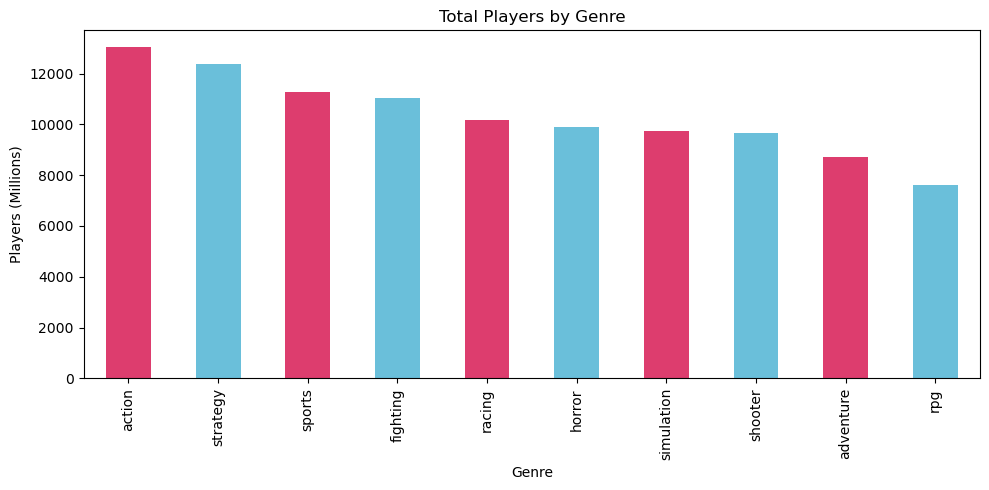

In [39]:
#visualization of total player by genre

genre_players = df.groupby('genre')['players_millions'].sum().sort_values(ascending=False)

# Plot 1: Players by Genre
plt.figure(figsize=(10,5))
genre_players.plot(kind="bar", color=['#dd3d6e','#6abfda','#dd3d6e','#6abfda', '#dd3d6e','#6abfda','#dd3d6e','#6abfda','#dd3d6e','#6abfda'])
plt.title("Total Players by Genre")
plt.xlabel("Genre")
plt.ylabel("Players (Millions)")
plt.tight_layout()
plt.show()

# What is the distribution of players by platform?

In [40]:
# getting rid of pc and mobile
platform_df = df[
    (df['platform'] == 'nintendo switch') |
    (df['platform'] == 'cross platform') |
    (df['platform'] == 'playstation') |
    (df['platform'] == 'xbox')
]
platform_players = platform_df.groupby('platform')['players_millions'].sum().sort_values(ascending=False)
platform_players.unique()
platform_players

platform
playstation        18408.82
cross platform     18158.33
xbox               17840.07
nintendo switch    15023.83
Name: players_millions, dtype: float64

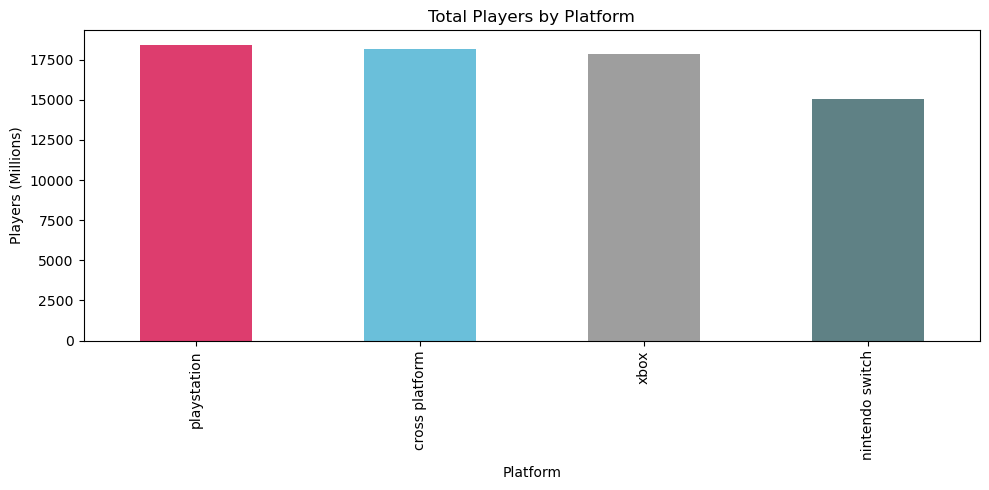

In [41]:
# Plot 2: Players by Console/Platform

plt.figure(figsize=(10,5))
platform_players.plot(kind='bar', color = ['#dd3d6e','#6abfda','#9e9e9e', '#5f8185'])
plt.title("Total Players by Platform")
plt.xlabel("Platform")
plt.ylabel("Players (Millions)")
plt.tight_layout()
plt.show()
